# Capstone: Analisando a temperatura do Brasil

Nessa prática iremos juntar os conhecimentos que vimos durante toda a matéria. Vamos analisar os dados de temperatura do Brasil que vimos nas aulas de Python. Vamos utilizar uma [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) para estimar a taxa de variação da temperatura ao longo dos anos. Finalmente, vamos visualizar esses valores em um mapa do Brasil.

Faremos funções para cada etapa para podermos testar as partes do nosso código separadamente.

## Setup

Abaixo, vamos carregar todas as bibliotecas que precisamos:

* `numpy` para fazer contas com matrizes e vetores
* `maptlotlib.pyplot` para fazer gráficos
* `mpl_toolkits.basemap` para fazer mapas
* `scipy.stats` para a regressão linear
* `glob` para descobrir os nomes de todos os arquivos em uma pasta

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import glob 

<div class="alert text-center" style="font-size: 16pt">
Diferente das outras práticas, eu vou preecher o código inicial ao vivo durante a aula. 
<br><br>
Façam junto comigo para não se perderem.
</div>

 1 - lat, long
 2 - ler temp abs
3 - ler anomalias
4 - calcular temp real
5 - regressão
6 - mapa

### Primeira Parte: Calcular LAT e LONG

In [2]:
def lat_long (nome):
    """
    Lê Lat e Long dos arquivos
    nome é string com o nome dos arquivos de temperaturas
    
    """
    
    arquivo = open(nome)
    for linhas in range (0,5):
        linha = arquivo.readline()
    lat =  - float(linha.split()[1])
    long = - float(linha.split()[3]) 
    
    
    return (lat, long)

In [3]:
lat, long = lat_long ("dados/0.80S-49.02W-TAVG-Trend.txt ")
print(lat, long)

-0.8 -49.02


### Segunda Parte: Calcular TEMP_ABS

In [18]:
def temp_abs (nome):
    """
    Lê a temperatura absoluta dos arquivos.
    
    Nos retorna a temp_abs dos arquivos
    """
    
    arquivo = open(nome)
    for linhas in range (48):
        linha = arquivo.readline()
    partes = linha.split()
    temp_abs = float(partes[-3])
    
    return (temp_abs)

In [5]:
temp = temp_abs('dados/0.80S-49.02W-TAVG-Trend.txt')
print (temp)

26.74


### Terceira Parte: Calcular os Anos e as Anomalias

In [6]:
def anos_anomalias (nome):
    coluna = np.loadtxt(nome, comments = '%')
    anos = coluna[:,0]
    meses = coluna[:,1]
    anos_decimal = anos + 1/12 * (meses-1)
    
    anomalia_anual = coluna[0:,4]
    
    return (anos_decimal, anomalia_anual)

In [7]:
anos, anomalia = anos_anomalias("dados/0.80S-49.02W-TAVG-Trend.txt")
print(anos, anomalia)

temps_abs = temp_abs("dados/0.80S-49.02W-TAVG-Trend.txt")
temperatura = temps_abs + anomalia

[ 1845.          1845.08333333  1845.16666667 ...,  2013.5         2013.58333333
  2013.66666667] [   nan    nan -0.872 ...,    nan    nan    nan]


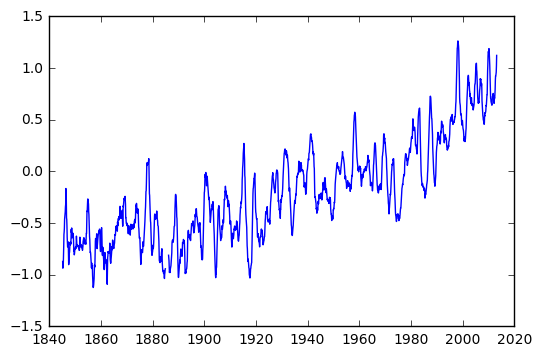

In [8]:
plt.figure()
plt.plot(anos,anomalia)

### Quarta Parte: Regressão 

In [9]:
anos, anomalia = anos_anomalias("dados/0.80S-49.02W-TAVG-Trend.txt")

temps_abs = temp_abs("dados/0.80S-49.02W-TAVG-Trend.txt")
temperatura = temps_abs + anomalia

In [10]:
a, b, r_value, p_value, str_eer = linregress(anos, temperatura)
print (a, "°C/ano")

nan °C/ano


C:\Users\Luís Sérgio\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Luís Sérgio\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Luís Sérgio\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [11]:
anos_sem_nan = []
temperatura_sem_nan = []
for i in range (len(temperatura)):
        if np.isnan (temperatura[i]):
            temperatura_sem_nan.append (temperatura[i])
            anos_sem_nan.append (anos[i])

In [12]:
not_nan = ~np.isnan(temperatura)
temperatura_sem_nan = temperatura [not_nan]
anos_sem_nan = anos[not_nan]

In [13]:
a, b, r_value, p_value, str_eer = linregress(anos_sem_nan, temperatura_sem_nan)

In [14]:
a

0.0083216097444633302

In [19]:
print (100*a, "°C/ano")

0.832160974446 °C/ano


### Quinta Parte: Juntar os dados para fazer o mapa

In [53]:
dados = glob.glob ('dados/*.txt')
for dado in dados:
    lat, long = lat_long (dado)
    print('lat = ', -lat,"long = ", -long)
    
    anos, anomalia = anos_anomalias(dado)

    temps_abs = temp_abs(dado)
    temperatura = temps_abs + anomalia
    
    anos_sem_nan = []
    temperatura_sem_nan = []
    for i in range (len(temperatura)):
        if np.isnan (temperatura[i]):
            temperatura_sem_nan.append (temperatura[i])
            anos_sem_nan.append (anos[i])
    
    not_nan = ~np.isnan(temperatura)
    temperatura_sem_nan = temperatura [not_nan]
    anos_sem_nan = anos[not_nan]
    
    a, b, r_value, p_value, str_eer = linregress(anos_sem_nan, temperatura_sem_nan)
    
    print(a*100)
       

lat =  0.8 long =  49.02
0.832160974446
lat =  10.45 long =  48.27
0.824324955821
lat =  13.66 long =  38.81
0.842379196862
lat =  15.27 long =  47.5
0.823420273845
lat =  2.41 long =  60.27
0.740442611066
lat =  20.09 long =  44.36
0.829024040812
lat =  20.09 long =  54.6
0.792039971005
lat =  23.31 long =  42.82
0.829184719942
lat =  23.31 long =  46.31
0.822966785858
lat =  24.92 long =  49.66
0.810509072374
lat =  29.74 long =  51.69
0.822230842453
lat =  4.02 long =  40.98
0.881488535533


AttributeError: Unknown property cmp

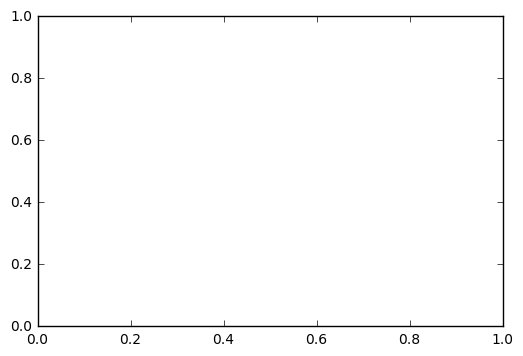

In [56]:
plt.figure()
plt.scatter(long, lat, s = 50, c= a*100, cmp= "Reds")
cb = plt.colorbar(pad = 1, aspect = 100)
cb.set_label ("°C/ano")

bm = Basemap(projection='merc',
            llcrnrlat=-35, llcrnrlon=-65,
            llcrnrlat=-5, urcrnrlon=-35, resolution = 'i')

In [ ]:
plt.figure()
bm.scatter (long, lat, s=40, c = a*100, cmap = "Reds", latlon= True)

plt.colorbar()
bm.bluemarble()
bm.drawcoastlines()
bm.drawstates()
bm.drawmeridians([-50,-40], labels = [0, 0, 1, 0])
bm.drawparalels()

**Course website**: https://github.com/mat-esp/about

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)